# **I &nbsp;&nbsp;&nbsp; Import Libraries**

In [1]:
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# **II &nbsp;&nbsp;&nbsp; Exploratory Data Analysis**

## **1 &nbsp;&nbsp;&nbsp; Load Data**

In [ ]:
train_path = '../data/input/cleaned/train/train.csv'
test_path = '../data/input/cleaned/test/test.csv'
val_path = '../data/input/cleaned/val/val.csv'

In [3]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
val_df = pd.read_csv(val_path)

In [4]:
df = pd.concat([train_df, test_df, val_df], axis=0, ignore_index=True)

## **2 &nbsp;&nbsp;&nbsp; Count Number of Words**

In [5]:
df['num_words'] = df['Text'].apply(lambda x: len(x.split()))
print(df['num_words'].describe())

count    31302.000000
mean        17.607022
std         28.170809
min          1.000000
25%          8.000000
50%         12.000000
75%         19.000000
max       2449.000000
Name: num_words, dtype: float64


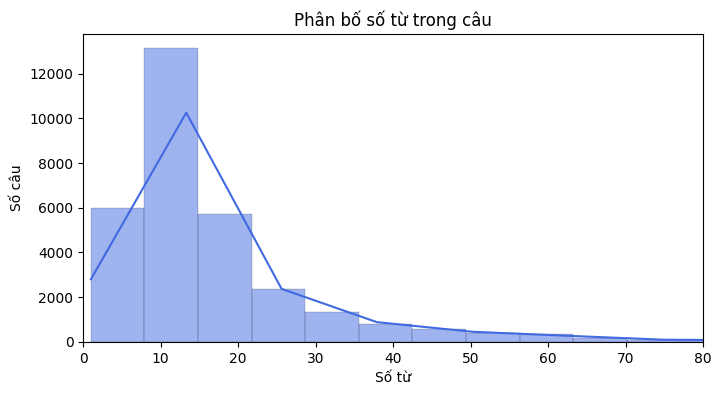

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['num_words'], kde=True, color="royalblue")
plt.xlim(0, 80)
plt.title("Phân bố số từ trong câu")
plt.xlabel("Số từ")
plt.ylabel("Số câu")
plt.show()
plt.show()


## **3 &nbsp;&nbsp;&nbsp; Count Number of Characters**

In [7]:
df['num_chars'] = df['Text'].str.len()
print(df['num_chars'].describe())

count    31302.000000
mean        92.867005
std        145.728542
min          2.000000
25%         47.000000
50%         69.000000
75%        103.000000
max      12905.000000
Name: num_chars, dtype: float64


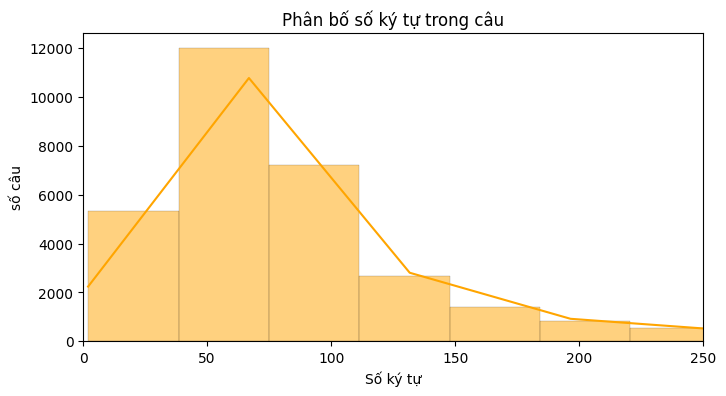

In [8]:
# Biểu đồ histogram số ký tự
plt.figure(figsize=(8,4))
sns.histplot(df['num_chars'], kde=True, color='orange')
plt.title("Phân bố số ký tự trong câu")
plt.xlim(0, 250)
plt.xlabel("Số ký tự")
plt.ylabel("số câu")
plt.show()

## **4 &nbsp;&nbsp;&nbsp; Count Words Frequency**

In [9]:
all_words = " ".join(df['Text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)  # 20 most frequent words
words, counts = zip(*common_words)
print(common_words)

[('không', 13403), ('rất', 13297), ('và', 11312), ('được', 7615), ('sản_phẩm', 7607), ('có', 7010), ('hàng', 6799), ('shop', 6044), ('là', 5706), ('của', 5524), ('chất_lượng', 5010), ('đẹp', 5007), ('mình', 4996), ('thì', 4597), ('giao', 4236), ('cho', 4074), ('mua', 3862), ('tốt', 3801), ('quá', 3794), ('này', 3740)]


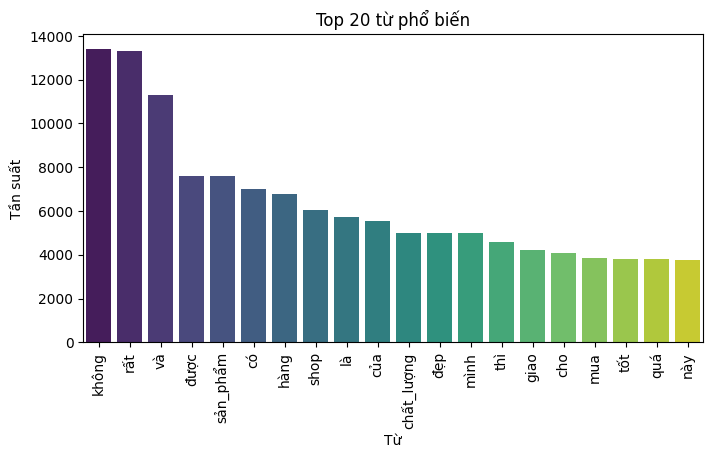

In [10]:
plt.figure(figsize=(8, 4))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.title("Top 20 từ phổ biến")
plt.ylabel("Tần suất")
plt.xlabel("Từ")
plt.xticks(rotation=90)
plt.show()

## **5 &nbsp;&nbsp;&nbsp; Find Ratio of Special Characters**

In [11]:
def special_char_ratio(text):
    pattern = r"[^0-9a-zA-ZÀ-ỹ\s]"
    special_char = re.findall(pattern, text)
    return len(special_char)/len(text)

df['special_char_ratio'] = df['Text'].apply(special_char_ratio)
print(df['special_char_ratio'].describe())

count    31302.000000
mean         0.040976
std          0.026799
min          0.000000
25%          0.020587
50%          0.040806
75%          0.061538
max          0.200000
Name: special_char_ratio, dtype: float64


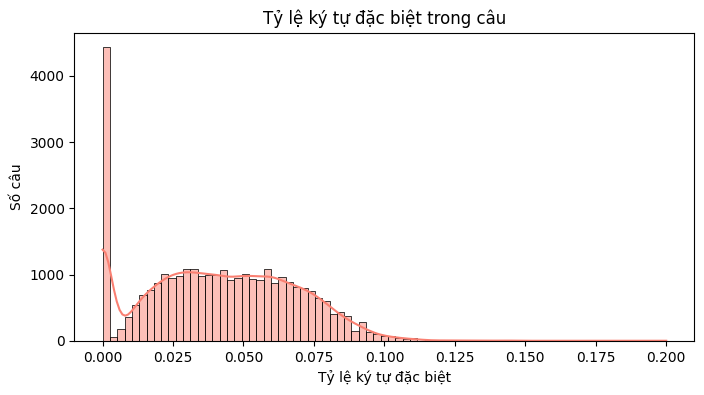

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(x=df['special_char_ratio'], color='salmon', kde=True)
plt.title("Tỷ lệ ký tự đặc biệt trong câu")
plt.xlabel("Tỷ lệ ký tự đặc biệt")
plt.ylabel("Số câu")
plt.show()

## **6 &nbsp;&nbsp;&nbsp; Count Label Distribution**

In [13]:
df["Label"].value_counts()

Label
1    14403
0    11909
2     4990
Name: count, dtype: int64

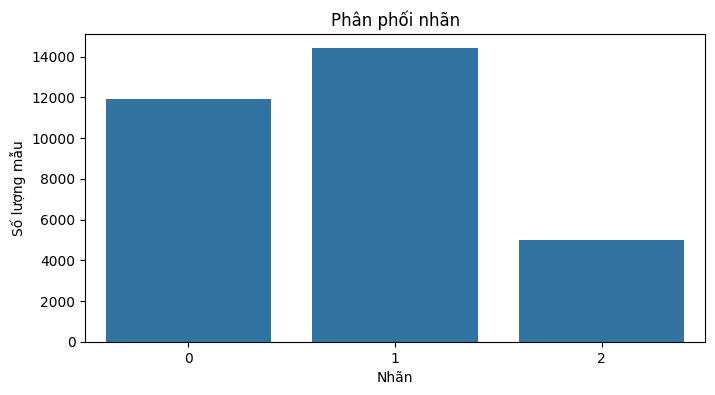

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["Label"])
plt.xlabel("Nhãn")
plt.ylabel("Số lượng mẫu")
plt.title("Phân phối nhãn")
plt.show()